In [1]:
import pandas as pd
import numpy as np 
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 12.8/12.8 MB 22.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Load English language model for spacy
NER = spacy.load("en_core_web_sm")

# Load Books

In [4]:
import os

all_books = [book for book in os.scandir('data/books/')]

In [5]:
book = all_books[0]
book_txt = open(book).read()
book_doc = NER(book_txt)

In [6]:
# Visualie enteties
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

## Load the known character names

In [7]:
character_df = pd.read_csv("characters.csv")
character_df.head(20)

,Unnamed: 0,book,character
0,0,Category:Baptism of Fire characters,Adalia
1,1,Category:Baptism of Fire characters,Adela
2,2,Category:Baptism of Fire characters,Aen Saevherne
3,3,Category:Baptism of Fire characters,Aevenien
4,4,Category:Baptism of Fire characters,Aglaïs
5,5,Category:Baptism of Fire characters,Albrich
6,6,Category:Baptism of Fire characters,Amavet
7,7,Category:Baptism of Fire characters,Angus Bri Cri
8,8,Category:Baptism of Fire characters,Anna Kameny
9,9,Category:Baptism of Fire characters,Anzelm Aubry


In [8]:
# Remove parenthesis next to characters (e.g. row 13)
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("\([^)]*\)", "", x))
# take only the first name of a character
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [9]:
pd.set_option('display.max_rows', None)
character_df.head(100)

,Unnamed: 0,book,character,character_firstname
0,0,Category:Baptism of Fire characters,Adalia,Adalia
1,1,Category:Baptism of Fire characters,Adela,Adela
2,2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,4,Category:Baptism of Fire characters,Aglaïs,Aglaïs
5,5,Category:Baptism of Fire characters,Albrich,Albrich
6,6,Category:Baptism of Fire characters,Amavet,Amavet
7,7,Category:Baptism of Fire characters,Angus Bri Cri,Angus
8,8,Category:Baptism of Fire characters,Anna Kameny,Anna
9,9,Category:Baptism of Fire characters,Anzelm Aubry,Anzelm


## Get a charater entity list per sentence

In [10]:
sent_entity_df = []

# Loop thorugh sentences, store a list of entities in each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)

In [11]:
sent_entity_df.head(20)

,sentence,entities
0,"(ï»¿'Does, she, always, devour, her, victims, ...",[]
1,"(\n\n, Velerad, spat, vehemently, on, the, str...",[Velerad]
2,"(\n\n, ', Come, on, ,, Geralt, ,, it, 'll, be,...",[Geralt]
3,"(Pish, !)",[]
4,"(Devours, ,, takes, a, bite, ,, leaves, aside,...",[]
5,"(She, only, bit, the, head, from, one, ,, gutt...",[]
6,"(Damned, mother's-, !, ')",[]
7,"(\n\n, ', Careful, ,, Velerad, ,, ', snarled, ...","[Velerad, Ostrit]"
8,"(', Say, what, you, want, about, the, striga, ...",[Adda]
9,"(\n\n, ', Has, anyone, she, 's, attacked, surv...",[]


In [12]:
# Filter out non-character entities
def filter_characters(entity_list, character_df):
    return [ent for ent in entity_list
        if ent in list(character_df.character)
        or ent in list(character_df.character_firstname)]

In [13]:
# Test the function
filter_characters(["test1","Geralt","test2"], character_df)

['Geralt']

In [14]:
# Filter characters and remove snetences with no characters
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_characters(x, character_df))
filtered_sent_entity_df = sent_entity_df[sent_entity_df['character_entities'].map(len)>0]

In [15]:
# Take only the first name of the character
filtered_sent_entity_df['character_entities'] = filtered_sent_entity_df['character_entities'].apply(lambda x: [item.split()[0] for item in x])

C:\Users\danie\AppData\Local\Temp\ipykernel_26920\1996892459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sent_entity_df['character_entities'] = filtered_sent_entity_df['character_entities'].apply(lambda x: [item.split()[0] for item in x])


In [16]:
filtered_sent_entity_df.head(100)

,sentence,entities,character_entities
1,"(\n\n, Velerad, spat, vehemently, on, the, str...",[Velerad],[Velerad]
2,"(\n\n, ', Come, on, ,, Geralt, ,, it, 'll, be,...",[Geralt],[Geralt]
7,"(\n\n, ', Careful, ,, Velerad, ,, ', snarled, ...","[Velerad, Ostrit]","[Velerad, Ostrit]"
8,"(', Say, what, you, want, about, the, striga, ...",[Adda],[Adda]
11,"(\n\n, Segelin, and, Ostrit, looked, at, each,...","[Segelin, Ostrit]","[Segelin, Ostrit]"
14,"(One, escaped-, ', \n\n, And, then, ,, ', inte...","[One, Velerad]",[Velerad]
23,"(\n\n, Having, finished, his, examination, Ger...",[Geralt],[Geralt]
25,"(It, was, Foltest, himself, .)",[Foltest],[Foltest]
59,"(\n\n, Yes, ,, ', Foltest, bristled, .)",[Foltest],[Foltest]
70,"(Geralt, grimaced, .)",[Geralt],[Geralt]


In [17]:
pd.reset_option('^display.', silent=True)
filtered_sent_entity_df

,sentence,entities,character_entities
1,"(\n\n, Velerad, spat, vehemently, on, the, str...",[Velerad],[Velerad]
2,"(\n\n, ', Come, on, ,, Geralt, ,, it, 'll, be,...",[Geralt],[Geralt]
7,"(\n\n, ', Careful, ,, Velerad, ,, ', snarled, ...","[Velerad, Ostrit]","[Velerad, Ostrit]"
8,"(', Say, what, you, want, about, the, striga, ...",[Adda],[Adda]
11,"(\n\n, Segelin, and, Ostrit, looked, at, each,...","[Segelin, Ostrit]","[Segelin, Ostrit]"
...,...,...,...
8913,"(Nenneke, ,, growing, red, with, the, effort, ...",[Nenneke],[Nenneke]
8916,"(Nenneke, raised, herself, to, her, knees, and...",[Nenneke],[Nenneke]
8922,"(\n\n, She, turned, to, Geralt, .)",[Geralt],[Geralt]
8925,"(Iola-, ', \n\n, ', Do, n't, say, anything, ,,...",[Nenneke],[Nenneke]


# Create relationships

In [18]:
window_size = 5
relationships = []

# Iterate through sentences and isolate characters using window size
for i in range(filtered_sent_entity_df.index[-1]):
    
    # Ensure window doesn't go past the end of the df
    window_end = min(i+5, filtered_sent_entity_df.index[-1])
    
    # Grab chars in the window and add them to an empty list
    char_list = sum((filtered_sent_entity_df.loc[i:window_end].character_entities), [])

    # Remove duplicated characters next to each other
    unique_char = [char_list[i] for i in range(len(char_list)) if (i==0) or char_list[i] != char_list[i-1]]

    # Create source-target relationship for characters next to each other 
    if len(unique_char) > 1:
        for idx, a in enumerate(unique_char[:-1]):
            b = unique_char[idx + 1]
            relationships.append({"source": a, "target": b})

In [19]:
relationships_df = pd.DataFrame(relationships)
relationships_df

,source,target
0,Velerad,Geralt
1,Velerad,Geralt
2,Geralt,Velerad
3,Velerad,Ostrit
4,Velerad,Ostrit
...,...,...
1839,Nenneke,Geralt
1840,Nenneke,Geralt
1841,Geralt,Nenneke
1842,Geralt,Nenneke


In [20]:
# Sort b->a to a->b (eg Nenneke	| Geralt -> Geralt | Nenneke)

relationships_df = pd.DataFrame(np.sort(relationships_df.values, axis = 1), columns = relationships_df.columns)
relationships_df

,source,target
0,Geralt,Velerad
1,Geralt,Velerad
2,Geralt,Velerad
3,Ostrit,Velerad
4,Ostrit,Velerad
...,...,...
1839,Geralt,Nenneke
1840,Geralt,Nenneke
1841,Geralt,Nenneke
1842,Geralt,Nenneke


In [21]:
# Aggregate duplicated relationships with a weight column
relationships_df["value"] = 1
relationships_df = relationships_df.groupby(["source","target"], sort=False, as_index=False).sum()
relationships_df

,source,target,value
0,Geralt,Velerad,9
1,Ostrit,Velerad,9
2,Adda,Ostrit,5
3,Adda,Segelin,3
4,Ostrit,Segelin,6
...,...,...,...
166,Count,Geralt,3
167,Dennis,Geralt,27
168,Dennis,Falwick,5
169,Count,Dennis,9


## Visualizations

In [22]:
P = nx.from_pandas_edgelist(relationships_df, source="source", target="target", edge_attr="value",create_using=nx.Graph())

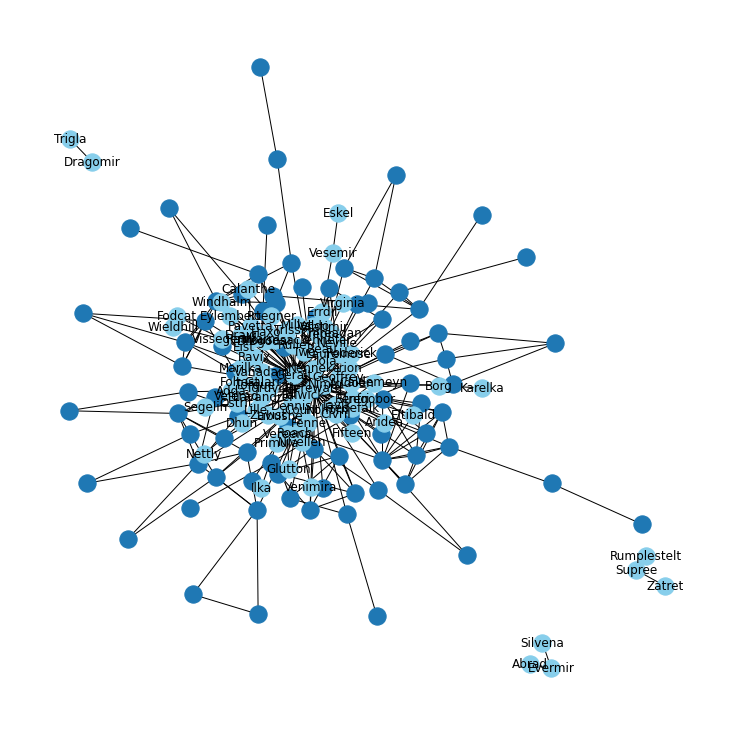

In [23]:
plt.figure(figsize=(10,10))
pos = nx.draw_kamada_kawai(P)
nx.draw(P, with_labels=True, node_color="skyblue", edge_cmap=plt.cm.Blues, pos = pos)

### Make a visualization using Pyvis

In [24]:
from pyvis.network import Network
net = Network(notebook=True, width="1920px", height="1080px", bgcolor="#222222", font_color="white")

node_degree = dict(P.degree)

nx.set_node_attributes(P, node_degree, 'size')
net.from_nx(P)
net.show("Whitcher_Relationships.html")

In [25]:
# Organize communities using a louvain algorithm
from community import community_louvain
communities = community_louvain.best_partition(P)

In [26]:
nx.set_node_attributes(P, communities, 'group')

com_net = Network(notebook=True, width="1920px", height="1080px", bgcolor="#222222", font_color="white")
com_net.from_nx(P)
com_net.show("Whitcher_Relationships.html")

## Loop through books

In [27]:
# Functions were saved as a package
from functions import *

In [28]:
# Initialize empty list for graphs from books
book_relationships = []
all_books = [b for b in os.scandir('data/books/') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [29]:
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])

    # Create relationship df for the current book
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)

    book_relationships.append(relationship_df)

C:\Users\danie\AppData\Local\Temp\ipykernel_26920\571611869.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])
C:\Users\danie\AppData\Local\Temp\ipykernel_26920\571611869.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])


In [46]:
# Concatenate all the dataframes
all_relationships_df = pd.concat(book_relationships)
all_relationships_df

,source,target,value
0,Geralt,Velerad,9
1,Ostrit,Velerad,9
2,Adda,Ostrit,5
3,Adda,Segelin,3
4,Ostrit,Segelin,6
...,...,...,...
137,Sh'eenaz,Villentretenmerth,6
138,Chireadan,Gardenia,3
139,Freya,Gardenia,4
140,Dandelion,Vissing,5


In [47]:
# Aggregate duplicated relationships with a weight column
all_relationships_df = all_relationships_df.groupby(["source","target"], sort=False, as_index=False).sum()
all_relationships_df

,source,target,value
0,Geralt,Velerad,9
1,Ostrit,Velerad,9
2,Adda,Ostrit,5
3,Adda,Segelin,3
4,Ostrit,Segelin,6
...,...,...,...
1509,Sh'eenaz,Villentretenmerth,6
1510,Chireadan,Gardenia,3
1511,Freya,Gardenia,4
1512,Dandelion,Vissing,5


In [60]:
all_relationships_df = all_relationships_df.sort_values(by='value', ascending=False)
all_relationships_df.reset_index(drop=True)

,source,target,value
0,Ciri,Yennefer,1084
1,Geralt,Yennefer,896
2,Ciri,Geralt,842
3,Dandelion,Geralt,447
4,Ciri,Kelpie,386
...,...,...,...
1509,Esterad,Vizimir,1
1510,Cahir,Maria,1
1511,Elan,Zyvik,1
1512,Morenn,Venzlav,1


In [88]:
top_relationships = all_relationships_df.head(200)

In [89]:
G = nx.from_pandas_edgelist(top_relationships, source = "source", target = "target", edge_attr = "value", create_using = nx.Graph())

In [92]:
node_degree = dict(G.degree)
communities = community_louvain.best_partition(G)
nx.set_node_attributes(G, node_degree, 'size')
nx.set_node_attributes(G, communities, 'group')


com_net = Network(notebook=False, width="7680px", height="4320px", bgcolor="#222222", font_color="white")
com_net.from_nx(G)

com_net.from_nx(G)
com_net.barnes_hut()
com_net.show_buttons(filter_="physics")
com_net.show("index.html")